In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import pandas as pd
concrete_df = pd.read_csv('/content/drive/MyDrive/CL/HOMEWORK/concrete_data_preprocessed.csv')

In [ ]:
concrete_df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,0.846302,-1.204081,-0.280312,79.99
1,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,1.039748,-1.204081,-0.280312,61.89
2,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,3.518569,40.27
3,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,5.009865,41.05
4,-0.767375,0.700778,-0.865375,0.465320,-1.019640,0.051885,0.657677,4.931375,44.30
...,...,...,...,...,...,...,...,...,...
1000,-0.021395,0.510363,0.541693,-0.116056,0.484495,-1.344795,-0.054648,-0.280312,44.28
1001,0.417755,-0.836471,0.935921,0.652861,0.738001,-2.017987,0.506993,-0.280312,31.18
1002,-1.247756,0.782052,0.826846,0.498140,0.011284,-1.057205,0.091055,-0.280312,23.70
1003,-1.146118,1.331235,-0.865375,-0.303597,0.890104,0.196324,0.201889,-0.280312,32.77


In [ ]:
concrete_df.duplicated().sum()

0

In [ ]:
concrete_df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

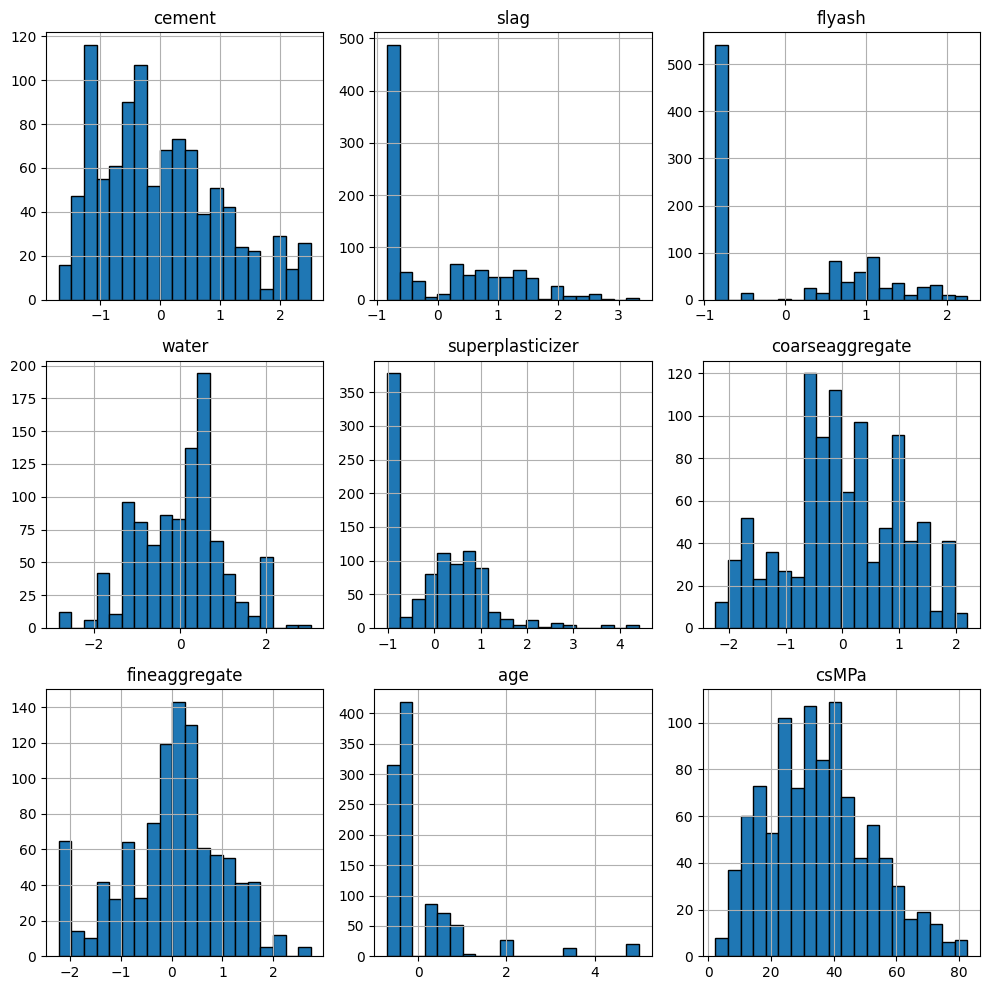

In [ ]:
import matplotlib.pyplot as plt

concrete_df.hist(figsize=(10,10),bins=20,edgecolor='black')
plt.tight_layout()

<Axes: >

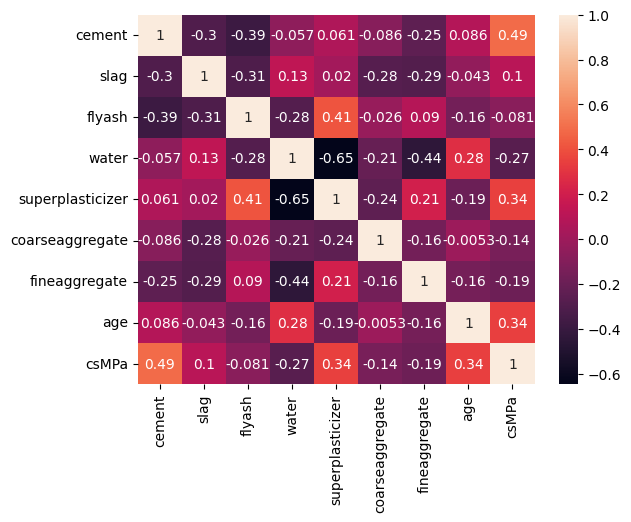

In [16]:
correlation_matrix= concrete_df.corr()
import seaborn as sns
sns.heatmap(correlation_matrix,annot=True)

In [19]:
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
standarizer = StandardScaler()
normalizer = Normalizer()
mmscaler = MinMaxScaler()
X = concrete_df.drop(['csMPa'],axis =1)
y = concrete_df['csMPa']
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

from sklearn.linear_model import LinearRegression
params = {'copy_X': [True,False], 'fit_intercept': [True,False],
               'n_jobs': [1,2,3,4,5,10,15,None], 'positive': [True,False]}
gscv = GridSearchCV(LinearRegression(),param_grid=params,scoring='r2',n_jobs=-1)
gscv.fit(X_train,y_train)
gscv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}

In [21]:
linear_reg = gscv.best_estimator_
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)
from sklearn.metrics import r2_score
print(f"Train: {r2_score(y_train,y_pred_train)} ")
print(f"TEST: {r2_score(y_test,y_pred_test)}")

Train: 0.6191930996854221 
TEST: 0.5502485567234179
